In [1]:
import pandas as pd

data_set = pd.read_csv(r'C:\Users\jos34\OneDrive\바탕 화면\호서대학교 4학년\AI프레임워크 보안\data_set.csv')

In [2]:
data_set

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827872,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827873,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827874,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
data_set[' Label'] = data_set[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

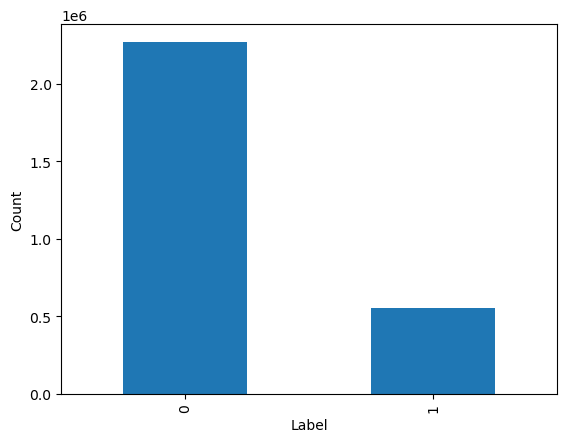

In [4]:
import matplotlib.pyplot as plt

data_set[' Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [5]:
data_set[' Label'].value_counts()

 Label
0    2271320
1     556556
Name: count, dtype: int64

In [6]:
x_data = data_set.drop([' Label'], axis=1)
y_data = data_set[' Label']

In [7]:
from sklearn.model_selection import train_test_split

x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x_data, y_data, test_size=0.5, random_state=42)
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(x_data, y_data, test_size=0.4, random_state=42)
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

Dataset Split: 50%
XGBoost accuracy : 0.9992375903328151
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1135313
           1       1.00      1.00      1.00    278625

    accuracy                           1.00   1413938
   macro avg       1.00      1.00      1.00   1413938
weighted avg       1.00      1.00      1.00   1413938

Confusion Matrix:
[[1134587     726]
 [    352  278273]]


Dataset Split: 60%
XGBoost accuracy : 0.9992662341278927
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907946
           1       1.00      1.00      1.00    223205

    accuracy                           1.00   1131151
   macro avg       1.00      1.00      1.00   1131151
weighted avg       1.00      1.00      1.00   1131151

Confusion Matrix:
[[907357    589]
 [   241 222964]]


Dataset Split: 70%
XGBoost accuracy : 0.9992550358749733
              precision    recall  f1-score   support

      

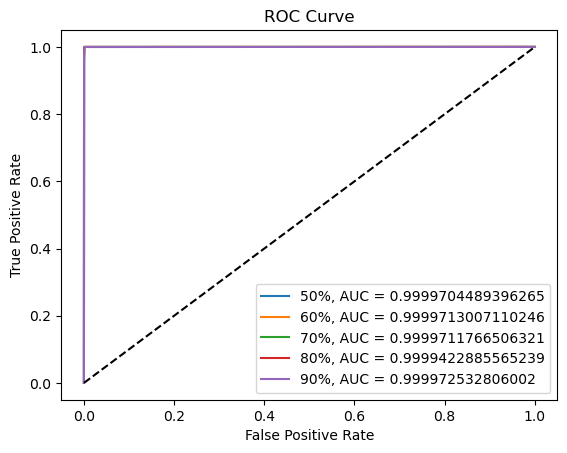

In [8]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix

datasets = {
    "50%": (x_train_50, x_test_50, y_train_50, y_test_50),
    "60%": (x_train_60, x_test_60, y_train_60, y_test_60),
    "70%": (x_train_70, x_test_70, y_train_70, y_test_70),
    "80%": (x_train_80, x_test_80, y_train_80, y_test_80),
    "90%": (x_train_90, x_test_90, y_train_90, y_test_90)
}


for split, (x_train, x_test, y_train, y_test) in datasets.items():
    
    model_xgb = xgb.XGBClassifier()
    
    model_xgb.fit(x_train, y_train)
    
    y_pred_xgb = model_xgb.predict(x_test)
    
    report_xgb = classification_report(y_test, y_pred_xgb)
    
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    
    print(f"Dataset Split: {split}")
    print(f"XGBoost accuracy : {accuracy_xgb}")
    print(report_xgb)
    print(f"Confusion Matrix:\n{cm_xgb}")
    
    y_proba_xgb = model_xgb.predict_proba(x_test)[:, 1]
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
    auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)
    
    
    plt.plot(fpr_xgb, tpr_xgb, label=f"{split}, AUC = {auc_score_xgb}")

    print("\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset Split: 50%
Logistic Regression accuracy : 0.8621601512937626
              precision    recall  f1-score   support

           0       0.90      0.93      0.92   1135313
           1       0.67      0.60      0.63    278625

    accuracy                           0.86   1413938
   macro avg       0.79      0.76      0.77   1413938
weighted avg       0.86      0.86      0.86   1413938

Confusion Matrix:
[[1051513   83800]
 [ 111097  167528]]




C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset Split: 60%
Logistic Regression accuracy : 0.8531990865940975
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    907946
           1       0.63      0.60      0.62    223205

    accuracy                           0.85   1131151
   macro avg       0.77      0.76      0.76   1131151
weighted avg       0.85      0.85      0.85   1131151

Confusion Matrix:
[[830119  77827]
 [ 88227 134978]]




C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset Split: 70%
Logistic Regression accuracy : 0.8558388331410022
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    681014
           1       0.65      0.59      0.62    167349

    accuracy                           0.86    848363
   macro avg       0.77      0.76      0.76    848363
weighted avg       0.85      0.86      0.85    848363

Confusion Matrix:
[[626946  54068]
 [ 68233  99116]]




C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset Split: 80%
Logistic Regression accuracy : 0.8573171421701062
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    454089
           1       0.65      0.60      0.63    111487

    accuracy                           0.86    565576
   macro avg       0.78      0.76      0.77    565576
weighted avg       0.85      0.86      0.86    565576

Confusion Matrix:
[[417514  36575]
 [ 44123  67364]]




C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset Split: 90%
Logistic Regression accuracy : 0.8553227152495863
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    226936
           1       0.65      0.59      0.62     55852

    accuracy                           0.86    282788
   macro avg       0.77      0.76      0.76    282788
weighted avg       0.85      0.86      0.85    282788

Confusion Matrix:
[[208752  18184]
 [ 22729  33123]]




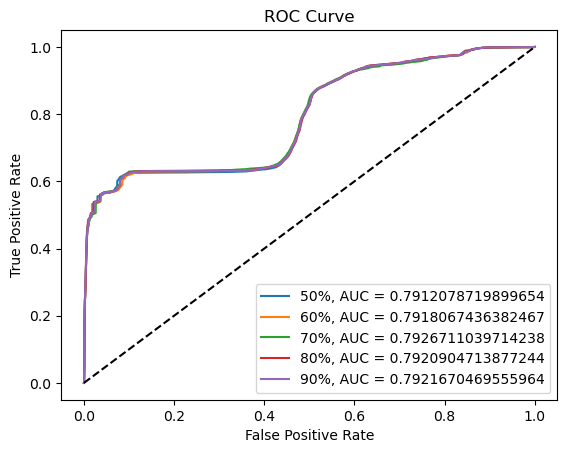

In [13]:
from sklearn.linear_model import LogisticRegression

for split, (x_train, x_test, y_train, y_test) in datasets.items():
    
    model_lr = LogisticRegression()
    
    model_lr.fit(x_train, y_train)
    
    y_pred_lr = model_lr.predict(x_test)
    
    report_lr = classification_report(y_test, y_pred_lr)
    
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    
    print(f"Dataset Split: {split}")
    print(f"Logistic Regression accuracy : {accuracy_lr}")
    print(report_lr)
    print(f"Confusion Matrix:\n{cm_lr}")
    
    y_proba_lr = model_lr.predict_proba(x_test)[:, 1]
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
    auc_score_lr = roc_auc_score(y_test, y_proba_lr)
    
    plt.plot(fpr_lr, tpr_lr, label=f"{split}, AUC = {auc_score_lr}")

    print("\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Dataset Split: 50%
Gradient Boosting accuracy : 0.9961858299303081
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1135313
           1       0.99      0.99      0.99    278625

    accuracy                           1.00   1413938
   macro avg       0.99      0.99      0.99   1413938
weighted avg       1.00      1.00      1.00   1413938

Confusion Matrix:
[[1132957    2356]
 [   3037  275588]]


Dataset Split: 60%
Gradient Boosting accuracy : 0.9966273291541095
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907946
           1       0.99      0.99      0.99    223205

    accuracy                           1.00   1131151
   macro avg       0.99      0.99      0.99   1131151
weighted avg       1.00      1.00      1.00   1131151

Confusion Matrix:
[[906216   1730]
 [  2085 221120]]


Dataset Split: 70%
Gradient Boosting accuracy : 0.9967667142484997
              precision    reca

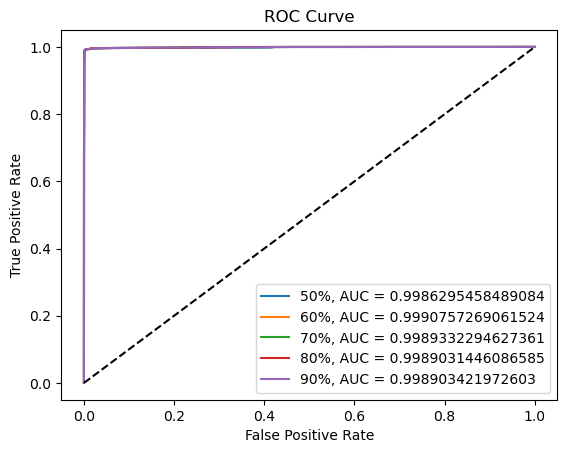

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

for split, (x_train, x_test, y_train, y_test) in datasets.items():
    
    model_gb = GradientBoostingClassifier()
    
    model_gb.fit(x_train, y_train)
    
    y_pred_gb = model_gb.predict(x_test)
    
    report_gb = classification_report(y_test, y_pred_gb)
    
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    
    cm_gb = confusion_matrix(y_test, y_pred_gb)
    
    print(f"Dataset Split: {split}")
    print(f"Gradient Boosting accuracy : {accuracy_gb}")
    print(report_gb)
    print(f"Confusion Matrix:\n{cm_gb}")
    
    y_proba_gb = model_gb.predict_proba(x_test)[:, 1]
    fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)
    auc_score_gb = roc_auc_score(y_test, y_proba_gb)
    
    plt.plot(fpr_gb, tpr_gb, label=f"{split}, AUC = {auc_score_gb}")

    print("\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Dataset Split: 50%
Random Forest accuracy : 0.9988033421550309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1135313
           1       1.00      1.00      1.00    278625

    accuracy                           1.00   1413938
   macro avg       1.00      1.00      1.00   1413938
weighted avg       1.00      1.00      1.00   1413938

Confusion Matrix:
[[1134476     837]
 [    855  277770]]


Dataset Split: 60%
Random Forest accuracy : 0.9988427716547128
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907946
           1       1.00      1.00      1.00    223205

    accuracy                           1.00   1131151
   macro avg       1.00      1.00      1.00   1131151
weighted avg       1.00      1.00      1.00   1131151

Confusion Matrix:
[[907294    652]
 [   657 222548]]


Dataset Split: 70%
Random Forest accuracy : 0.9988247955179563
              precision    recall  f1-score

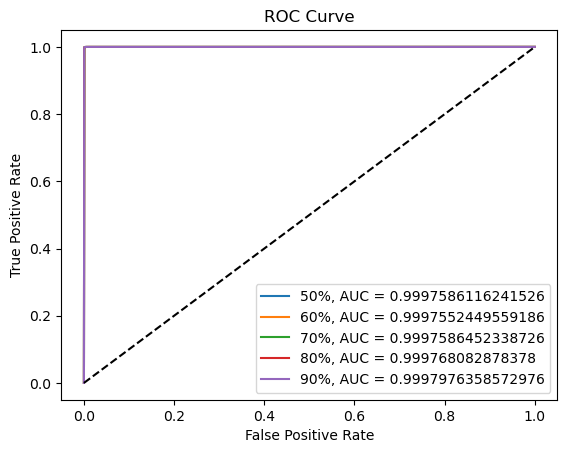

In [15]:
from sklearn.ensemble import RandomForestClassifier

for split, (x_train, x_test, y_train, y_test) in datasets.items():
    
    model_rf = RandomForestClassifier()
    
    model_rf.fit(x_train, y_train)
    
    y_pred_rf = model_rf.predict(x_test)
    
    report_rf = classification_report(y_test, y_pred_rf)
    
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    
    print(f"Dataset Split: {split}")
    print(f"Random Forest accuracy : {accuracy_rf}")
    print(report_rf)
    print(f"Confusion Matrix:\n{cm_rf}")
    
    y_proba_rf = model_rf.predict_proba(x_test)[:, 1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
    auc_score_rf = roc_auc_score(y_test, y_proba_rf)
    
    plt.plot(fpr_rf, tpr_rf, label=f"{split}, AUC = {auc_score_rf}")

    print("\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC

for split, (x_train, x_test, y_train, y_test) in datasets.items():
    
    model_svm = SVC(probability=True)  
    
    model_svm.fit(x_train, y_train)
    
    y_pred_svm = model_svm.predict(x_test)
    
    report_svm = classification_report(y_test, y_pred_svm)
    
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    
    print(f"Dataset Split: {split}")
    print(f"SVM accuracy : {accuracy_svm}")
    print(report_svm)
    print(f"Confusion Matrix:\n{cm_svm}")
    
    y_proba_svm = model_svm.predict_proba(x_test)[:, 1]
    fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm)
    auc_score_svm = roc_auc_score(y_test, y_proba_svm)
    
    plt.plot(fpr_svm, tpr_svm, label=f"{split}, AUC = {auc_score_svm}")

    print("\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for split, (x_train, x_test, y_train, y_test) in datasets.items():
    
    model_knn = KNeighborsClassifier()
    
    model_knn.fit(x_train, y_train)
    
    y_pred_knn = model_knn.predict(x_test.values)
    
    report_knn = classification_report(y_test, y_pred_knn)
    
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    
    print(f"Dataset Split: {split}")
    print(f"KNN accuracy : {accuracy_knn}")
    print(report_knn)
    print(f"Confusion Matrix:\n{cm_knn}")
    
    y_proba_knn = model_knn.predict_proba(x_test)[:, 1]
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
    auc_score_knn = roc_auc_score(y_test, y_proba_knn)
    
    plt.plot(fpr_knn, tpr_knn, label=f"{split}, AUC = {auc_score_knn}")

    print("\n")

plt.plot([0, 1], [0, 1], linestyle='--', color='black') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
